# Chapter 3 - Train A Neural Network with Multiple Output Neurons

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

Set the random seed to 2 so you always see similar results:

In [2]:
import random
random.seed(2)

import tensorflow as tf
tf.random.set_seed(2)

import numpy as np
np.random.seed(2)

### Your task

The restaurant delivery teams would like to choose different boxes based on the pizza types automatically. When a pizza is vegan, they want to put it in a green box, vegetarian in a yellow box, and meat pizzas in blue boxes.

The cameras above the ovens automatically detect the ingredients, and you need to use that information to suggest what plate to use.

### Understand the data

In [3]:
pizza_types = pd.read_csv('datasets/pizza_types.csv', index_col=0)

In [4]:
pizza_types.head(10)

,corn,olives,mushrooms,spinach,pineapple,artichoke,chilli,pepper,onion,mozzarella,egg,pepperoni,beef,chicken,bacon,vegan,vegetarian,meaty
0,False,True,False,True,False,False,True,False,False,False,True,True,True,False,False,False,False,True
1,True,False,False,True,False,False,True,False,False,True,False,True,True,True,False,False,False,True
2,False,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False,False,True
3,False,True,True,False,False,False,True,False,False,True,False,True,True,False,False,False,False,True
4,False,True,False,False,True,True,False,False,False,True,True,True,True,False,False,False,False,True
5,False,False,False,False,True,False,False,True,True,False,True,True,False,False,False,False,False,True
6,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True
7,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True
8,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True
9,True,False,False,False,False,False,True,True,False,True,False,False,True,True,False,False,False,True


The last 3 columns specify the pizza type:
- Vegan
- Vegetarian
- Meat

The rest of the columns are your input columns.

In [5]:
pizza_types.shape

(5520, 18)

5520 examples. Let's split them into an 80% training dataset and a 20% testing dataset.

In [6]:
training_dataset = pizza_types.sample(frac=0.8)
testing_dataset = pizza_types[~pizza_types.index.isin(training_dataset.index)]

In [7]:
training_dataset.shape

(4416, 18)

In [8]:
testing_dataset.shape

(1104, 18)

You now have 4416 examples to train on and 1104 to test on.

### Set Up and Train Your First Multi-Output Neural Network

In [9]:
pizza_type_model = Sequential()

pizza_type_model.add(Dense(3, input_dim=15, activation='softmax'))

sgd = SGD()

pizza_type_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
pizza_type_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 48        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


Split the training set into two so you can keep an eye on the model's performance on unseen data during training as well:
- a training set
- a validation set

And start training:

In [10]:
history_sgd_pizza_type_model = pizza_type_model.fit(
    training_dataset[['corn', 'olives', 'mushrooms', 'spinach', 'pineapple',
       'artichoke', 'chilli', 'pepper', 'onion', 'mozzarella', 'egg',
       'pepperoni', 'beef', 'chicken', 'bacon',]], 
    training_dataset[['vegan', 'vegetarian', 'meaty']], 
    epochs=200,
    validation_split=0.2,
)

Epoch 1/200
111/111 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.7596 - val_loss: 0.4289 - val_accuracy: 0.8756
Epoch 2/200
111/111 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.9097 - val_loss: 0.3515 - val_accuracy: 0.8959
Epoch 3/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9151 - val_loss: 0.3289 - val_accuracy: 0.8959
Epoch 4/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.9148 - val_loss: 0.3172 - val_accuracy: 0.8959
Epoch 5/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2651 - accuracy: 0.9148 - val_loss: 0.3086 - val_accuracy: 0.8959
Epoch 6/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2570 - accuracy: 0.9148 - val_loss: 0.3011 - val_accuracy: 0.8959
Epoch 7/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.9148 - val_loss: 0.2942 - val_accuracy: 0.8959

Epoch 58/200
111/111 [==============================] - 0s 3ms/step - loss: 0.1203 - accuracy: 0.9318 - val_loss: 0.1360 - val_accuracy: 0.9163
Epoch 59/200
111/111 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.9337 - val_loss: 0.1347 - val_accuracy: 0.9174
Epoch 60/200
111/111 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9357 - val_loss: 0.1334 - val_accuracy: 0.9186
Epoch 61/200
111/111 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9386 - val_loss: 0.1322 - val_accuracy: 0.9208
Epoch 62/200
111/111 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.9403 - val_loss: 0.1310 - val_accuracy: 0.9231
Epoch 63/200
111/111 [==============================] - 0s 3ms/step - loss: 0.1149 - accuracy: 0.9422 - val_loss: 0.1298 - val_accuracy: 0.9242
Epoch 64/200
111/111 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9431 - val_loss: 0.1286 - val_accuracy:

Epoch 115/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9972 - val_loss: 0.0891 - val_accuracy: 0.9943
Epoch 116/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9972 - val_loss: 0.0886 - val_accuracy: 0.9955
Epoch 117/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9975 - val_loss: 0.0881 - val_accuracy: 0.9955
Epoch 118/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9975 - val_loss: 0.0876 - val_accuracy: 0.9966
Epoch 119/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9975 - val_loss: 0.0871 - val_accuracy: 0.9966
Epoch 120/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9975 - val_loss: 0.0866 - val_accuracy: 0.9966
Epoch 121/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9977 - val_loss: 0.0861 - val_ac

111/111 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 1.0000
Epoch 172/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 1.0000
Epoch 173/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 1.0000
Epoch 174/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 1.0000
Epoch 175/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 176/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 177/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 1.0000

In [11]:
test_loss, test_acc = pizza_type_model.evaluate(
    testing_dataset[['corn', 'olives', 'mushrooms', 'spinach', 'pineapple',
       'artichoke', 'chilli', 'pepper', 'onion', 'mozzarella', 'egg',
       'pepperoni', 'beef', 'chicken', 'bacon',]], 
    testing_dataset[['vegan', 'vegetarian', 'meaty']]
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

35/35 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.04993113875389099, accuracy = 1.0


The data was linearly separable and you have now trained a Network with multiple output neurons! Awesome!

### Try Out a Different Optimizer

In [12]:
from tensorflow.keras.optimizers import Adam

To do that we will modify Component 3 - the optimizer:

In [13]:
pizza_type_model = Sequential()
pizza_type_model.add(Dense(3, input_dim=15, activation='softmax'))
adam = Adam()
pizza_type_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
pizza_type_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 48        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_adam_pizza_type_model = pizza_type_model.fit(
    training_dataset[['corn', 'olives', 'mushrooms', 'spinach', 'pineapple',
       'artichoke', 'chilli', 'pepper', 'onion', 'mozzarella', 'egg',
       'pepperoni', 'beef', 'chicken', 'bacon',]], 
    training_dataset[['vegan', 'vegetarian', 'meaty']], 
    epochs=200,
    validation_split=0.2,
)

Epoch 1/200
111/111 [==============================] - 0s 3ms/step - loss: 0.7733 - accuracy: 0.6761 - val_loss: 0.5824 - val_accuracy: 0.8133
Epoch 2/200
111/111 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.8933 - val_loss: 0.4204 - val_accuracy: 0.8824
Epoch 3/200
111/111 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.9142 - val_loss: 0.3639 - val_accuracy: 0.8959
Epoch 4/200
111/111 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.9156 - val_loss: 0.3373 - val_accuracy: 0.8959
Epoch 5/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.9153 - val_loss: 0.3200 - val_accuracy: 0.8959
Epoch 6/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.9148 - val_loss: 0.3058 - val_accuracy: 0.8959
Epoch 7/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.9148 - val_loss: 0.2932 - val_accuracy: 0.8959

Epoch 58/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 59/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 1.0000
Epoch 60/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 61/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 62/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 63/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 64/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy:

Epoch 115/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 116/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 117/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 118/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 119/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 120/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 121/200
111/111 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0030 - val_ac

111/111 [==============================] - 0s 3ms/step - loss: 4.7490e-04 - accuracy: 1.0000 - val_loss: 5.2283e-04 - val_accuracy: 1.0000
Epoch 171/200
111/111 [==============================] - 0s 3ms/step - loss: 4.5853e-04 - accuracy: 1.0000 - val_loss: 5.0477e-04 - val_accuracy: 1.0000
Epoch 172/200
111/111 [==============================] - 0s 3ms/step - loss: 4.4261e-04 - accuracy: 1.0000 - val_loss: 4.8665e-04 - val_accuracy: 1.0000
Epoch 173/200
111/111 [==============================] - 0s 3ms/step - loss: 4.2718e-04 - accuracy: 1.0000 - val_loss: 4.7004e-04 - val_accuracy: 1.0000
Epoch 174/200
111/111 [==============================] - 0s 3ms/step - loss: 4.1277e-04 - accuracy: 1.0000 - val_loss: 4.5417e-04 - val_accuracy: 1.0000
Epoch 175/200
111/111 [==============================] - 0s 3ms/step - loss: 3.9838e-04 - accuracy: 1.0000 - val_loss: 4.3881e-04 - val_accuracy: 1.0000
Epoch 176/200
111/111 [==============================] - 0s 3ms/step - loss: 3.8442e-04 - accura

Let's compare the training history when using SGD and Adam:

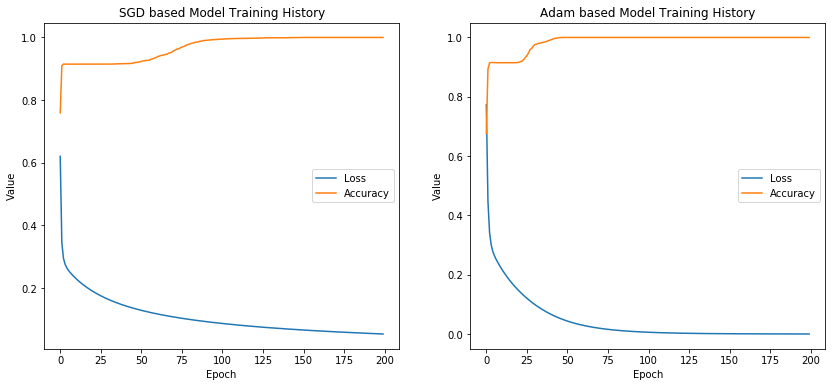

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()

axes[0].plot(history_sgd_pizza_type_model.history['loss'])
axes[0].plot(history_sgd_pizza_type_model.history['accuracy'])
axes[0].set_title('SGD based Model Training History')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Loss', 'Accuracy'], loc='center right')
axes[1].plot(history_adam_pizza_type_model.history['loss'])
axes[1].plot(history_adam_pizza_type_model.history['accuracy'])
axes[1].set_title('Adam based Model Training History')
axes[1].set_ylabel('Value')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

**Loss (the blue line)** - with SGD, it reaches 0 after approximately 200 iterations; however, when using Adam, it reaches 0 after around 100 iterations.

**Accuracy (the orange line)** reaches 100% when loss goes below 0.2. It happens more slowly with SGD, after about 75 iterations, but really fast with Adam, after only about 50 iterations.